In [2]:
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras import optimizers
import pywt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle

In [3]:
# cv = KFold(n_splits=10, random_state=1, shuffle=True)
totalaccuracy = []
totalprecision = []
totalrecall = []
totalf1 = []

In [4]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels,)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [5]:
penghuni = os.listdir("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\Penghuni")
temen1 = os.listdir("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\Temen1")
bkn_penghuni = os.listdir("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\BukanPenghuni")

In [6]:
data = []
labels = []

for i in penghuni:

    image = cv2.imread("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\penghuni\\"+i)
    
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    
    resize_img = np.float32(resize_img) / 255.0
    
    # Calculate gradient 
    gx = cv2.Sobel(resize_img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(resize_img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    # image_array = Image.fromarray(image , 'RGB')
    # resize_img = image_array.resize((50 , 50))
    # coeffs1 = pywt.dwt2(resize_img, 'bior1.3')
    # LL, (LH, HL, HH) = coeffs1
    data.append(np.array(mag))
    data.append(np.array(angle))
    data.append(np.array(gx))
    data.append(np.array(gy))
    labels.append(0)
    labels.append(0)
    labels.append(0)
    labels.append(0)

for u in bkn_penghuni:
    
    image = cv2.imread("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\BukanPenghuni\\"+u)
    
    # image = np.float32(image) / 255.0
    Image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    resize_img = np.float32(resize_img) / 255.0
    # Calculate gradient 
    gx = cv2.Sobel(resize_img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(resize_img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    # image_array = Image.fromarray(image , 'RGB')
    # resize_img = image_array.resize((50 , 50))
    # coeffs2 = pywt.dwt2(resize_img, 'bior1.3')
    # LL, (LH, HL, HH) = coeffs2
    data.append(np.array(mag))
    data.append(np.array(angle))
    data.append(np.array(gx))
    data.append(np.array(gy))
    labels.append(1)
    labels.append(1)
    labels.append(1)
    labels.append(1)

for j in temen1:

    image = cv2.imread("C:\\Users\\muham\\OneDrive\\Documents\\TA\\images\\train\\Temen1\\"+j)
    
    image_array = Image.fromarray(image , 'RGB')
    resize_img = image_array.resize((50 , 50))
    
    resize_img = np.float32(resize_img) / 255.0
    
    # Calculate gradient 
    gx = cv2.Sobel(resize_img, cv2.CV_32F, 1, 0, ksize=1)
    gy = cv2.Sobel(resize_img, cv2.CV_32F, 0, 1, ksize=1)
    mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    
    # image_array = Image.fromarray(image , 'RGB')
    # resize_img = image_array.resize((50 , 50))
    # coeffs1 = pywt.dwt2(resize_img, 'bior1.3')
    # LL, (LH, HL, HH) = coeffs1
    data.append(np.array(mag))
    data.append(np.array(angle))
    data.append(np.array(gx))
    data.append(np.array(gy))
    labels.append(2)
    labels.append(2)
    labels.append(2)
    labels.append(2)

In [7]:
cells = np.array(data, dtype=object)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [14]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(cells, labels):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    print("="*20)
    print("Fold: ", cnt)
    print("="*20)
    cnt +=1
    x_train , x , y_train , y = train_test_split(cells[train_index] , labels[train_index] , 
                                                test_size = 0.2 ,
                                                random_state = 11)

    x_eval ,x_test ,y_eval , y_test = train_test_split(x , y , 
                                                        test_size = 0.5 , 
                                                        random_state = 11)

    y_train = to_categorical(y_train, num_classes = 3)
    y_eval = to_categorical(y_eval, num_classes = 3)
    y_test = to_categorical(y_test, num_classes = 3)

    #instantiate the model
    height = 50
    width = 50
    classes = 3
    channels = 3
    epoch = 10
    model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
    model.summary()

    #compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

    #fit the model onto the dataset
    # x_train = np.array (x_train)

    h = model.fit(x_train, y_train, epochs = epoch, batch_size = 32,validation_data=(x_eval,y_eval),shuffle=True)
    namamodel = 'hog_model' + str(cnt) + '.pkl'
    pickle.dump(model, open(namamodel, 'wb'))
    pickled_model = pickle.load(open('hog_model2.pkl', 'rb'))

    #evaluate the model on test data
    predictions = model.evaluate(x_test, y_test)
    evaluation = model.evaluate(x_eval, y_eval)

    print(f'LOSS : {evaluation[0]}')
    print(f'ACCURACY : {evaluation[1]}')
    print(f'LOSS : {predictions[0]}')
    print(f'ACCURACY : {predictions[1]}')

    predict_x=model.predict(x_test) 
    yhat_classes=np.argmax(predict_x,axis=1)
    yhat_classes = to_categorical(yhat_classes, num_classes = 3)
#     print("Prediksi:", yhat_classes)

    # print("Precision Score : ",precision_score(y_test, y_pred, 
    #                                            pos_label='positive'
    #                                            average='micro'))
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
    totalaccuracy.append(accuracy)
    # precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes, average='macro')
    print('Precision: %f' % precision)
    totalprecision.append(precision)
    # recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes, average='macro')
    print('Recall: %f' % recall)
    totalrecall.append(recall)
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes, average='macro')
    print('F1 score: %f' % f1)
    totalf1.append(f1)

Fold:1, Train set: 1475, Test set:369
Fold:  1
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_16 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_po

c:\users\muham\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_20 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 11, 11, 32)       

c:\users\muham\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_28 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_28 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 11, 11, 32)       

c:\users\muham\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_32 (Ba  (None, 24, 24, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_32 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 11, 11, 32)       

 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 11, 11, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_25 (Dropout)        (None, 11, 11, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 9, 32)          9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 32)         0         
 g2D)                                                            
                                                                 
 batch_normalization_26 (Bat  (None, 4, 4, 32)         128       
 chNormalization)                                                
          

Epoch 44/75
33/33 [==============================] - 3s 90ms/step - loss: 0.7799 - accuracy: 0.6130 - val_loss: 0.7438 - val_accuracy: 0.6031
Epoch 45/75
33/33 [==============================] - 3s 87ms/step - loss: 0.7096 - accuracy: 0.6349 - val_loss: 1.5953 - val_accuracy: 0.5038
Epoch 46/75
33/33 [==============================] - 3s 83ms/step - loss: 0.6113 - accuracy: 0.6969 - val_loss: 3.4555 - val_accuracy: 0.5191
Epoch 47/75
33/33 [==============================] - 3s 82ms/step - loss: 0.4898 - accuracy: 0.7979 - val_loss: 2.8551 - val_accuracy: 0.5115
Epoch 48/75
33/33 [==============================] - 3s 92ms/step - loss: 0.3631 - accuracy: 0.8627 - val_loss: 0.6894 - val_accuracy: 0.6870
Epoch 49/75
33/33 [==============================] - 3s 95ms/step - loss: 0.2891 - accuracy: 0.8894 - val_loss: 0.7687 - val_accuracy: 0.7099
Epoch 50/75
33/33 [==============================] - 3s 95ms/step - loss: 0.2573 - accuracy: 0.9171 - val_loss: 1.9362 - val_accuracy: 0.5344
Epoch 

In [15]:
print("=" * 20)
print("rata-rata Akurasi: ",sum(totalaccuracy)/len(totalaccuracy))
print("rata-rata Presisi: ",sum(totalprecision)/len(totalprecision))
print("rata-rata Recall: ",sum(totalrecall)/len(totalrecall))
print("rata-rata F1: ",sum(totalf1)/len(totalf1))

rata-rata Akurasi:  0.5418918918918919
rata-rata Presisi:  0.596291787348313
rata-rata Recall:  0.4160981220230515
rata-rata F1:  0.35684771549996613


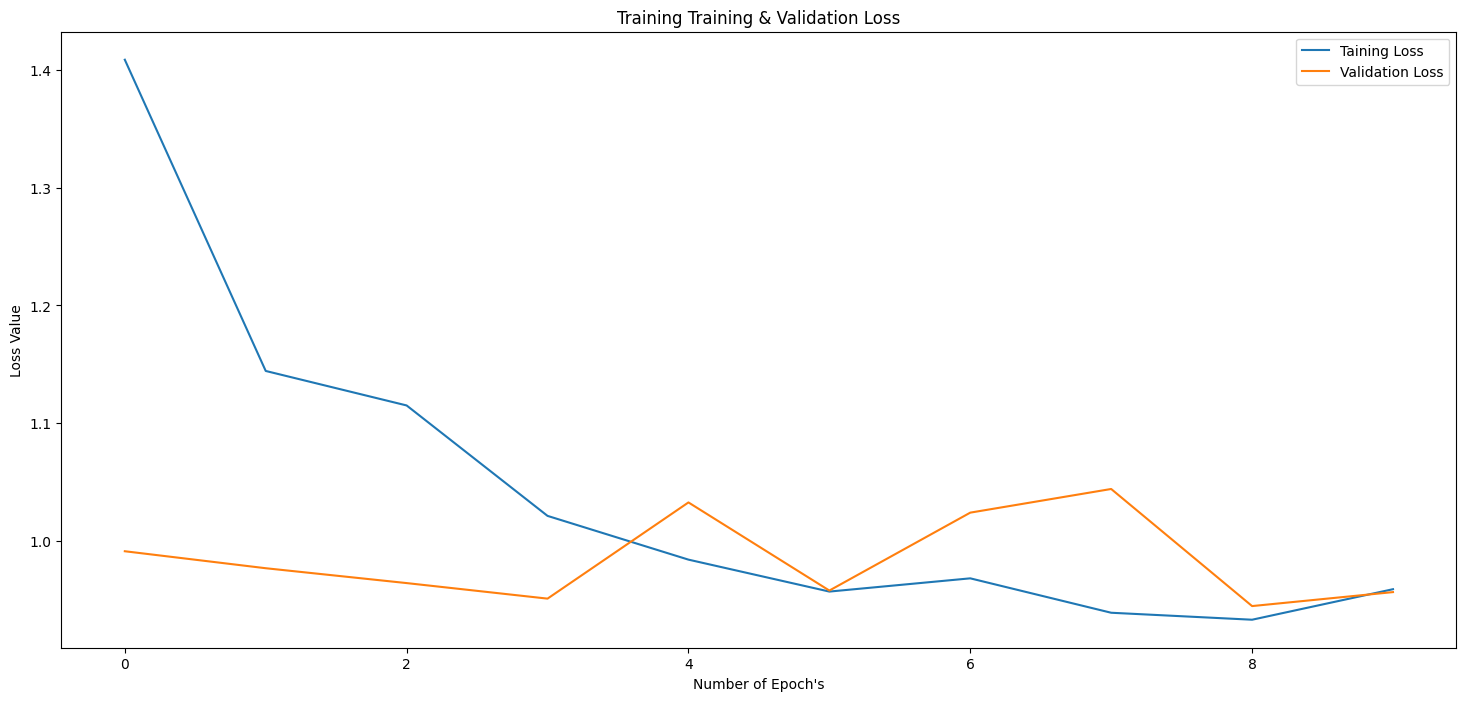

In [16]:
plt.figure(figsize = (18,8))
plt.plot(range(epoch), h.history['loss'], label = 'Taining Loss')
plt.plot(range(epoch), h.history['val_loss'], label = 'Validation Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Loss Value')
plt.title('Training Training & Validation Loss')
plt.legend(loc = "best")

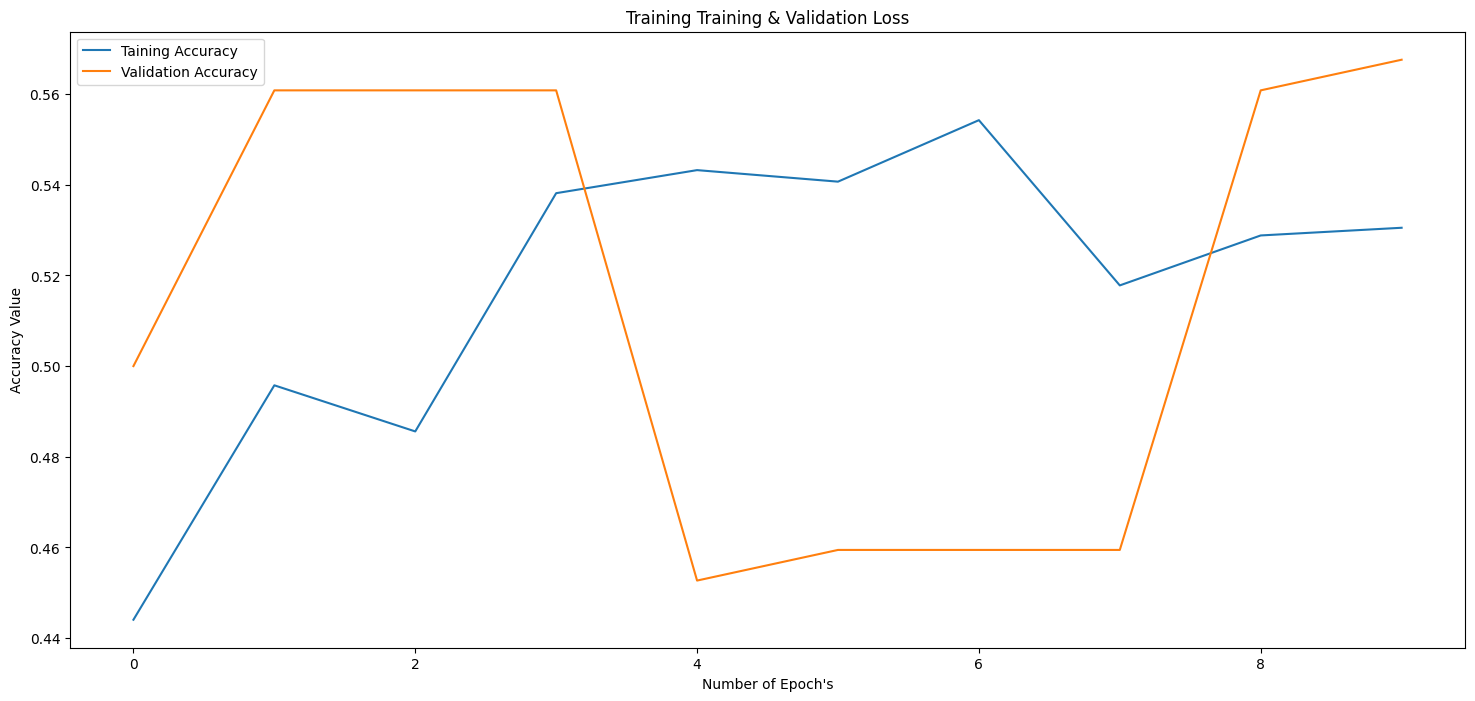

In [17]:
plt.figure(figsize = (18,8))
plt.plot(range(epoch), h.history['accuracy'], label = 'Taining Accuracy')
plt.plot(range(epoch), h.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy Value')
plt.title('Training Training & Validation Loss')
plt.legend(loc = "best")